In [1]:
from glob import glob
import pandas as pd
import numpy as np
import cv2

In [2]:
# Using glob to read the images from path
img_path = '../input/flickr8k/Images/'
images = glob(img_path+'*.jpg')
len(images)

8091

In [3]:
# list holds the paths of the images
images[:5]

['../input/flickr8k/Images/3226254560_2f8ac147ea.jpg',
 '../input/flickr8k/Images/214543992_ce6c0d9f9b.jpg',
 '../input/flickr8k/Images/2366643786_9c9a830db8.jpg',
 '../input/flickr8k/Images/3368819708_0bfa0808f8.jpg',
 '../input/flickr8k/Images/2190227737_6e0bde2623.jpg']

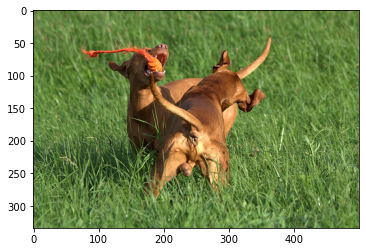

In [4]:
# Visualizing some of the images
import matplotlib.pyplot as plt


plt.figure()
img = cv2.imread(images[7])
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [5]:
# Import resnet50 from kkeras ResNet50


from tensorflow.keras.applications.resnet50 import ResNet50
inception_model = ResNet50(include_top=True)

102981632/102967424 [==============================] - 1s 0us/step


In [6]:
inception_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [7]:
print(inception_model.layers[-2].output)
# print(inception_model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 2048), dtype=tf.float32, name=None), name='avg_pool/Mean:0', description="created by layer 'avg_pool'")


In [8]:
# Getting all the layers except the last layer from resnet into our new model.
from keras.models import Model

last = inception_model.layers[-2].output
base_model = Model(inputs = inception_model.input, outputs=last)
base_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

# Image Preprocessing .

# Creating a dictionary called image_features.

- **Key of the dictionary will be the name of the individual image.**

- **Value of each key will be the predicted output we get by feeding out model each individual image .**

In [9]:
images[0]
# Below you can see the image name .

'../input/flickr8k/Images/3226254560_2f8ac147ea.jpg'

In [10]:
images[0].split('/')[-1]
# Below is what we want as our dictionary key value .

'3226254560_2f8ac147ea.jpg'

In [11]:
image_features = {}
count = 0

for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(224,224))
    
    img = img.reshape(1,224,224,3)
    
    pred = base_model.predict(img).reshape(2048,)
    
    img_name = i.split('/')[-1]
    image_features[img_name] = pred
    count +=1
    
    if count > 1500:
        break
    elif count % 50 == 0:
        print(count)

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500


In [12]:
image_features
# We see the key as the image name and the value to each key is the predicted output from our model .

{'3226254560_2f8ac147ea.jpg': array([6.2825638e-01, 7.8491366e-01, 5.6670177e-01, ..., 8.9139181e-01,
        4.5924771e-05, 0.0000000e+00], dtype=float32),
 '214543992_ce6c0d9f9b.jpg': array([0.46220586, 0.29161927, 0.06892882, ..., 0.573068  , 0.        ,
        0.28785384], dtype=float32),
 '2366643786_9c9a830db8.jpg': array([0.8897092 , 0.16498396, 0.03830731, ..., 0.2704721 , 0.67855304,
        0.15241733], dtype=float32),
 '3368819708_0bfa0808f8.jpg': array([0.4930518 , 0.648831  , 0.03944141, ..., 0.49528658, 0.04874261,
        0.        ], dtype=float32),
 '2190227737_6e0bde2623.jpg': array([0.82795006, 0.        , 0.98436755, ..., 0.12665229, 0.50968117,
        2.5331454 ], dtype=float32),
 '2752809449_632cd991b3.jpg': array([0.24190295, 0.35491422, 0.03130041, ..., 0.        , 0.12823111,
        0.1354152 ], dtype=float32),
 '3097776588_312932e438.jpg': array([0.5856012 , 0.05671071, 0.89787817, ..., 2.3858993 , 0.03280618,
        0.09501779], dtype=float32),
 '12065061

# Text Preprocessing

In [13]:
caption_path = '../input/flickr8k/captions.txt'

In [14]:
# We start from 14 cause the caption.txt file starts with 2 words image and caption which we dont need so we skip it and read from after .
captions = open(caption_path,'rb').read()[14:].decode('utf 8').split('\n')
captions 

['1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg,A girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting',
 '1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with each other on the road .',
 '1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots are staring at each other in the street .',
 '1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each other on the road .',
 '1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .',
 '1002674143_1b742ab4b8.jpg,A little girl covered in paint sits in front of a painted rainbow with her hands in a 

# Creating a dictionary for the captions .

- **Such that Image name will be the key .**

- **The captions will be the value for the corresponding keys .**

Note that every Image has 5 captions so value for each key of the dictionary will be a list of 5 captions .

In [15]:
# To get the name of the image and caption from captions we can use ,
captions[3].split(',')[0], captions[2].split(',')[-1]



('1000268201_693b08cb0e.jpg',
 'A little girl climbing into a wooden playhouse .')

In [16]:
caption_dict = {}

for i in captions:
    try:
        img_name = i.split(',')[0]
        caption = i.split(',')[-1]
        if img_name in image_features:
            if img_name not in caption_dict:
                caption_dict[img_name] = [caption]
            else:
                caption_dict[img_name].append(caption)
    except:
        pass

In [17]:
caption_dict

{'1002674143_1b742ab4b8.jpg': ['A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .',
  'A little girl is sitting in front of a large painted rainbow .',
  'A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .',
  'There is a girl with pigtails sitting in front of a rainbow painting .',
  'Young girl with pigtails painting outside in the grass .'],
 '102351840_323e3de834.jpg': ['A man drilling a hole in the ice .',
  'A man is drilling through the frozen ice of a pond .',
  'A person in the snow drilling a hole in the ice .',
  'A person standing on a frozen lake .',
  'Two men are ice fishing .'],
 '1024138940_f1fefbdce1.jpg': ['Two different breeds of brown and white dogs play on the beach .',
  'Two dogs are making a turn on a soft sand beach .',
  'Two dogs playing in the sand at the beach .',
  'Two dogs playing together on a beach .',
  'Two large tan dogs play along a sandy beach .'],
 '10320

- **Now we will add startofstring and endofstring tokens to all of our captions and also lower case our strings.**

In [18]:
# Function to add startofseq and endofseq to each string 
def sos_eos(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified

In [19]:
for key,value in caption_dict.items():
    for v in value:
        caption_dict[key][value.index(v)] = sos_eos(v)

In [20]:
# Now lets take a look at caption_dict . 
caption_dict

{'1002674143_1b742ab4b8.jpg': ['startofseq a little girl covered in paint sits in front of a painted rainbow with her hands in a bowl . endofseq',
  'startofseq a little girl is sitting in front of a large painted rainbow . endofseq',
  'startofseq a small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it . endofseq',
  'startofseq there is a girl with pigtails sitting in front of a rainbow painting . endofseq',
  'startofseq young girl with pigtails painting outside in the grass . endofseq'],
 '102351840_323e3de834.jpg': ['startofseq a man drilling a hole in the ice . endofseq',
  'startofseq a man is drilling through the frozen ice of a pond . endofseq',
  'startofseq a person in the snow drilling a hole in the ice . endofseq',
  'startofseq a person standing on a frozen lake . endofseq',
  'startofseq two men are ice fishing . endofseq'],
 '1024138940_f1fefbdce1.jpg': ['startofseq two different breeds of brown and white dogs play on the beach 

# Lets create a Vocabulary and Vectorizing each word in our vocabulary .

A vocabulary is dictionary which consists of all the words in our captions .

In [21]:
vocab_words = {}
count = 1

for key,value in caption_dict.items():
    for v in value:
        for word in v.split():
            if word not in vocab_words:
                vocab_words[word] = count
                count +=1

In [22]:
vocab_words

{'startofseq': 1,
 'a': 2,
 'little': 3,
 'girl': 4,
 'covered': 5,
 'in': 6,
 'paint': 7,
 'sits': 8,
 'front': 9,
 'of': 10,
 'painted': 11,
 'rainbow': 12,
 'with': 13,
 'her': 14,
 'hands': 15,
 'bowl': 16,
 '.': 17,
 'endofseq': 18,
 'is': 19,
 'sitting': 20,
 'large': 21,
 'small': 22,
 'the': 23,
 'grass': 24,
 'plays': 25,
 'fingerpaints': 26,
 'white': 27,
 'canvas': 28,
 'on': 29,
 'it': 30,
 'there': 31,
 'pigtails': 32,
 'painting': 33,
 'young': 34,
 'outside': 35,
 'man': 36,
 'drilling': 37,
 'hole': 38,
 'ice': 39,
 'through': 40,
 'frozen': 41,
 'pond': 42,
 'person': 43,
 'snow': 44,
 'standing': 45,
 'lake': 46,
 'two': 47,
 'men': 48,
 'are': 49,
 'fishing': 50,
 'different': 51,
 'breeds': 52,
 'brown': 53,
 'and': 54,
 'dogs': 55,
 'play': 56,
 'beach': 57,
 'making': 58,
 'turn': 59,
 'soft': 60,
 'sand': 61,
 'playing': 62,
 'at': 63,
 'together': 64,
 'tan': 65,
 'along': 66,
 'sandy': 67,
 'tent': 68,
 'being': 69,
 'set': 70,
 'up': 71,
 'about': 72,
 'to': 7

**Now we will have to convert the list of strings in caption_dict into integers as our neural network understands numbers not strings .**

Basically we will go into the captions list and split each string and match each word with vocab_word and get its numerical value to create the string and append that to caption_dict . 

In [23]:
for key, value in caption_dict.items():
    for v in value:
        encoded = []
        for word in v.split():
            encoded.append(vocab_words[word])
        caption_dict[key][value.index(v)] = encoded

In [24]:
caption_dict

{'1002674143_1b742ab4b8.jpg': [[1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   6,
   9,
   10,
   2,
   11,
   12,
   13,
   14,
   15,
   6,
   2,
   16,
   17,
   18],
  [1, 2, 3, 4, 19, 20, 6, 9, 10, 2, 21, 11, 12, 17, 18],
  [1,
   2,
   22,
   4,
   6,
   23,
   24,
   25,
   13,
   26,
   6,
   9,
   10,
   2,
   27,
   28,
   13,
   2,
   12,
   29,
   30,
   17,
   18],
  [1, 31, 19, 2, 4, 13, 32, 20, 6, 9, 10, 2, 12, 33, 17, 18],
  [1, 34, 4, 13, 32, 33, 35, 6, 23, 24, 17, 18]],
 '102351840_323e3de834.jpg': [[1, 2, 36, 37, 2, 38, 6, 23, 39, 17, 18],
  [1, 2, 36, 19, 37, 40, 23, 41, 39, 10, 2, 42, 17, 18],
  [1, 2, 43, 6, 23, 44, 37, 2, 38, 6, 23, 39, 17, 18],
  [1, 2, 43, 45, 29, 2, 41, 46, 17, 18],
  [1, 47, 48, 49, 39, 50, 17, 18]],
 '1024138940_f1fefbdce1.jpg': [[1,
   47,
   51,
   52,
   10,
   53,
   54,
   27,
   55,
   56,
   29,
   23,
   57,
   17,
   18],
  [1, 47, 55, 49, 58, 2, 59, 29, 2, 60, 61, 57, 17, 18],
  [1, 47, 55, 62, 6, 23, 61, 63, 23, 57, 17, 18],
  [1

In [25]:
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

In [26]:
# Finding out the max length of our strings .
MAX_LEN = 0
for key,value in caption_dict.items():
    for v in value:
        if len(v)> MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2, 3, 4, 5, 6, 7, 8, 6, 9, 10, 2, 11, 12, 13, 14, 15, 6, 2, 16, 17, 18]
[1, 2, 22, 4, 6, 23, 24, 25, 13, 26, 6, 9, 10, 2, 27, 28, 13, 2, 12, 29, 30, 17, 18]
[1, 2, 180, 190, 6, 2, 77, 191, 54, 77, 192, 193, 2, 53, 194, 121, 2, 41, 46, 54, 195, 196, 17, 18]
[1, 23, 131, 6, 23, 77, 122, 19, 697, 2, 691, 692, 461, 2, 128, 263, 23, 131, 6, 23, 343, 377, 698, 73, 611, 151, 93, 17, 18]
[1, 2, 43, 6, 2, 98, 191, 1560, 2, 262, 82, 23, 146, 352, 2, 126, 54, 27, 205, 73, 1938, 346, 2, 53, 54, 27, 205, 210, 29, 17, 18]
[1, 2, 180, 13, 2, 2308, 190, 6, 1155, 124, 54, 2, 126, 538, 101, 20, 29, 23, 512, 10, 2, 36, 13, 2309, 124, 54, 2, 27, 122, 29, 2, 927, 17, 18]


In [27]:
MAX_LEN

34

In [28]:
len(vocab_words)

4037

In [29]:
VOCAB_SIZE = len(vocab_words)

# We will pass Image_features and caption_dict to this function.
def generator(photo,caption):
    X = []                                                # Will hold the predicted vector features from resnet
    y_in = []                                             # Will hold the starting word of a sentence
    y_out = []                                            # Will hold the next sequence of word in the sentence
    for key,value in caption.items():
        for v in value:
            for i in range(1,len(v)):
                X.append(photo[key])
                in_seq = [v[:i]]
                out_seq = v[i]
                
                # in_seq adds padding upto the length of MAX_LEN
                # if in_seq is[1,2,22,33] ----------->[1,2,22,33,.......], len of which which will be MAX_LEN
                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                # out_seq is always of a constant length of 1 so we will convert it to VOCAB_SIZE .
                # And then all the indices will be zeros except of the indice where the word resides will be 1.
                # Our output layer will be dense with softmax so it will assign probabilities to every word .
                # So the word with the highest probability will be the next word, 1 being highest and 0 being opposite .
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE+1)[0]
                
                y_in.append(in_seq)
                y_out.append(out_seq)
                
    return X,y_in,y_out
                
                 

In [30]:
X,y_in,y_out = generator(image_features,caption_dict)

In [31]:
# X
len(X),len(y_in),len(y_out)

(92233, 92233, 92233)

In [32]:
# Convert all 3 variables into numpy arrays 
X = np.array(X)
y_in = np.array(y_in,dtype='float64')
y_out = np.array(y_out,dtype='float64')

In [33]:
X.shape,y_in.shape,y_out.shape

((92233, 2048), (92233, 34), (92233, 4038))

In [34]:
from keras.utils.vis_utils import plot_model
from keras.models import Model,Sequential
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, CuDNNLSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate

In [35]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(vocab_words)

image_model = Sequential()
image_model.add(Dense(embedding_size,input_shape=(2048,),activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(CuDNNLSTM(256,return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output,language_model.output])

output = CuDNNLSTM(128,return_sequences=True)(conca)
output = CuDNNLSTM(512,return_sequences=False)(output)
output = Dense(vocab_size+1,activation='softmax')(output)
modele = Model(inputs=[image_model.input,language_model.input],outputs=output)
# x = LSTM(128,return_sequences=True)(conca)
# x = LSTM(512,return_sequences=False)(x)
# x = Dense(vocab_size+1)(x)
# out = Activation('softmax')(x)

modele.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])
modele.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 34, 128)           0         
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 128)           516736    
_________________________________________________________________
cu_dnnlstm (CuDNNLSTM)       (None, 34, 256)           395264    
_________________________________________________________________
time_distributed (TimeDistri (None, 34, 128)           32896     
Total params: 944,896
Traina

In [36]:
modele.fit([X,y_in],y_out,batch_size=1000,epochs=500)

Epoch 1/500
93/93 [==============================] - 13s 107ms/step - loss: 5.2761 - accuracy: 0.1377
Epoch 2/500
93/93 [==============================] - 10s 104ms/step - loss: 4.8431 - accuracy: 0.1845
Epoch 3/500
93/93 [==============================] - 10s 104ms/step - loss: 4.5424 - accuracy: 0.2382
Epoch 4/500
93/93 [==============================] - 10s 104ms/step - loss: 4.4062 - accuracy: 0.2524
Epoch 5/500
93/93 [==============================] - 10s 105ms/step - loss: 4.3161 - accuracy: 0.2568
Epoch 6/500
93/93 [==============================] - 10s 104ms/step - loss: 4.2436 - accuracy: 0.2635
Epoch 7/500
93/93 [==============================] - 10s 104ms/step - loss: 4.1710 - accuracy: 0.2695
Epoch 8/500
93/93 [==============================] - 10s 105ms/step - loss: 4.1002 - accuracy: 0.2748
Epoch 9/500
93/93 [==============================] - 10s 103ms/step - loss: 3.9904 - accuracy: 0.2830
Epoch 10/500
93/93 [==============================] - 10s 104ms/step - loss: 3.854

In [37]:
# Saving the model & also just the weights .
# Also saving the vocabulary vocab_words .
modele.save('model.h5')
modele.save_weights('model_weights.h5')
np.save('vocab.npy',vocab_words)

In [38]:
# Creating inverse Dictionary using vocab_words 
# This means all the keys will be changed to values and values to keys from vocab_words
inv_dict = {v:k for k,v in vocab_words.items()}


In [39]:
inv_dict

{1: 'startofseq',
 2: 'a',
 3: 'little',
 4: 'girl',
 5: 'covered',
 6: 'in',
 7: 'paint',
 8: 'sits',
 9: 'front',
 10: 'of',
 11: 'painted',
 12: 'rainbow',
 13: 'with',
 14: 'her',
 15: 'hands',
 16: 'bowl',
 17: '.',
 18: 'endofseq',
 19: 'is',
 20: 'sitting',
 21: 'large',
 22: 'small',
 23: 'the',
 24: 'grass',
 25: 'plays',
 26: 'fingerpaints',
 27: 'white',
 28: 'canvas',
 29: 'on',
 30: 'it',
 31: 'there',
 32: 'pigtails',
 33: 'painting',
 34: 'young',
 35: 'outside',
 36: 'man',
 37: 'drilling',
 38: 'hole',
 39: 'ice',
 40: 'through',
 41: 'frozen',
 42: 'pond',
 43: 'person',
 44: 'snow',
 45: 'standing',
 46: 'lake',
 47: 'two',
 48: 'men',
 49: 'are',
 50: 'fishing',
 51: 'different',
 52: 'breeds',
 53: 'brown',
 54: 'and',
 55: 'dogs',
 56: 'play',
 57: 'beach',
 58: 'making',
 59: 'turn',
 60: 'soft',
 61: 'sand',
 62: 'playing',
 63: 'at',
 64: 'together',
 65: 'tan',
 66: 'along',
 67: 'sandy',
 68: 'tent',
 69: 'being',
 70: 'set',
 71: 'up',
 72: 'about',
 73: 'to

In [40]:
# Creating a function to get image from images variable
def getImage(x):
    test_img_path = images[x]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB)
    test_img = cv2.resize(test_img,(224,224))
    test_img = np.reshape(test_img,(1,224,224,3))
    
    return test_img

**including a test-images dataset to enable testing on newer images**



In [41]:
test_path = '..//kaggle/input/test-images'
test_i = glob(test_path+'*.jpg')
len(test_i)

0

In [42]:
test_i[:5]

[]

In [43]:
caption

''

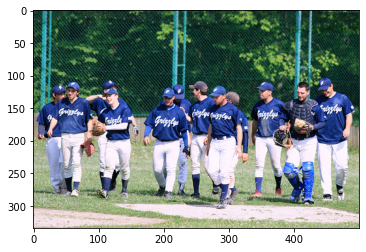

In [44]:
# Function to visualize the image 
import random as rd
test_img = rd.randint(5000, 8000)
def vizImage(x):
    test_img_path = images[x]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB)
    plt.imshow(test_img)
    
# Creating a function to get image from images variable
def getImage(x):
    test_img_path = images[x]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB)
    test_img = cv2.resize(test_img,(224,224))
    test_img = np.reshape(test_img,(1,224,224,3))
    
    return test_img

    
# Predicting image value on base_model or resnet50 .
test = base_model.predict(getImage(test_img)).reshape(1,2048)
vizImage(test_img)


# The output will be 1 batch size and 2048 values same as the output of resnet50 .


text_input = ['startofseq']

count = 0
caption = ''

# We will run upto 25 words or strings then we ill exit .
while count < 25:
    count +=1
    
    encoded = []
    # Below loop will vectorize the text input from vocab_words .
    for i in text_input:
        encoded.append(vocab_words[i])
    
    encoded = [encoded]
    encoded = pad_sequences(encoded,padding='post',maxlen = MAX_LEN)
    
    prediction = np.argmax(modele.predict([test,encoded]))
    
    sampled_word = inv_dict[prediction]
    
    caption = caption+ ' ' + sampled_word
    
    if sampled_word == 'endofseq':
        break
    # Appending the predicted word to text input for next word prediction .    
    text_input.append(sampled_word)
   

In [45]:
caption

' a group of men pink dance on a busy child in front of a pulling street . endofseq'